In [1]:
import pandas as pd
crime=pd.read_csv("C:\\Users\\PRATIK\\Downloads\\crime_data.csv")
crime

,Unnamed: 0,Murder,Assault,UrbanPop,Rape
0,Alabama,13.2,236,58,21.2
1,Alaska,10.0,263,48,44.5
2,Arizona,8.1,294,80,31.0
3,Arkansas,8.8,190,50,19.5
4,California,9.0,276,91,40.6
5,Colorado,7.9,204,78,38.7
6,Connecticut,3.3,110,77,11.1
7,Delaware,5.9,238,72,15.8
8,Florida,15.4,335,80,31.9
9,Georgia,17.4,211,60,25.8


In [2]:
#importing hierarchical clustering libraries
import scipy.cluster.hierarchy as sch
from sklearn.cluster import AgglomerativeClustering
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sn

In [3]:
#normalization function
def minmax_func(i):
    x = (i-i.min()/(i.max()-i.min()))
    return (x)

In [6]:
crime_norm = minmax_func(crime.iloc[:,1:])

In [7]:
crime_norm

,Murder,Assault,UrbanPop,Rape
0,13.151807,235.84589,57.457627,21.01137
1,9.951807,262.84589,47.457627,44.31137
2,8.051807,293.84589,79.457627,30.81137
3,8.751807,189.84589,49.457627,19.31137
4,8.951807,275.84589,90.457627,40.41137
5,7.851807,203.84589,77.457627,38.51137
6,3.251807,109.84589,76.457627,10.91137
7,5.851807,237.84589,71.457627,15.61137
8,15.351807,334.84589,79.457627,31.71137
9,17.351807,210.84589,59.457627,25.61137


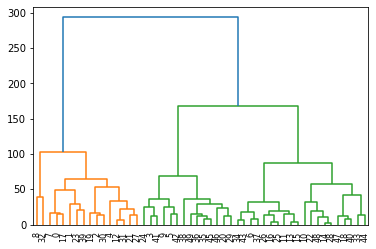

In [8]:
#create dendrogram
dendrogram = sch.dendrogram(sch.linkage(crime_norm,method='complete'))
#mothods: 'single', 'complete','centroid'

In [9]:
#create clusters
hc = AgglomerativeClustering(n_clusters=3, affinity = 'euclidean', linkage = 'complete')

In [10]:
hc

AgglomerativeClustering(linkage='complete', n_clusters=3)

In [11]:
#save clusters for charts
y_hc = hc.fit_predict(crime_norm)
Clusters=pd.DataFrame(y_hc,columns=['Clusters'])

In [12]:
Clusters.value_counts()

Clusters
1           20
0           16
2           14
dtype: int64

In [13]:
y_hc

array([0, 0, 0, 2, 0, 2, 1, 0, 0, 2, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 2, 0,
       1, 0, 2, 1, 1, 0, 1, 2, 0, 0, 0, 1, 1, 2, 2, 1, 2, 0, 1, 2, 2, 1,
       1, 2, 2, 1, 1, 2], dtype=int64)

In [15]:
crime['h_clustered']=y_hc

In [16]:
crime

,Unnamed: 0,Murder,Assault,UrbanPop,Rape,h_clustered
0,Alabama,13.2,236,58,21.2,0
1,Alaska,10.0,263,48,44.5,0
2,Arizona,8.1,294,80,31.0,0
3,Arkansas,8.8,190,50,19.5,2
4,California,9.0,276,91,40.6,0
5,Colorado,7.9,204,78,38.7,2
6,Connecticut,3.3,110,77,11.1,1
7,Delaware,5.9,238,72,15.8,0
8,Florida,15.4,335,80,31.9,0
9,Georgia,17.4,211,60,25.8,2


In [17]:
crime_norm

,Murder,Assault,UrbanPop,Rape
0,13.151807,235.84589,57.457627,21.01137
1,9.951807,262.84589,47.457627,44.31137
2,8.051807,293.84589,79.457627,30.81137
3,8.751807,189.84589,49.457627,19.31137
4,8.951807,275.84589,90.457627,40.41137
5,7.851807,203.84589,77.457627,38.51137
6,3.251807,109.84589,76.457627,10.91137
7,5.851807,237.84589,71.457627,15.61137
8,15.351807,334.84589,79.457627,31.71137
9,17.351807,210.84589,59.457627,25.61137
